In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astroML.stats

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[8,6]

In [2]:
def next_day (today):
    p=np.random.uniform(0,1,1)
    if today==1:
        if p<=0.1:
            return 0
        else: 
            return 1
    else:
        if p<=0.5:
            return 0
        else:
            return 1

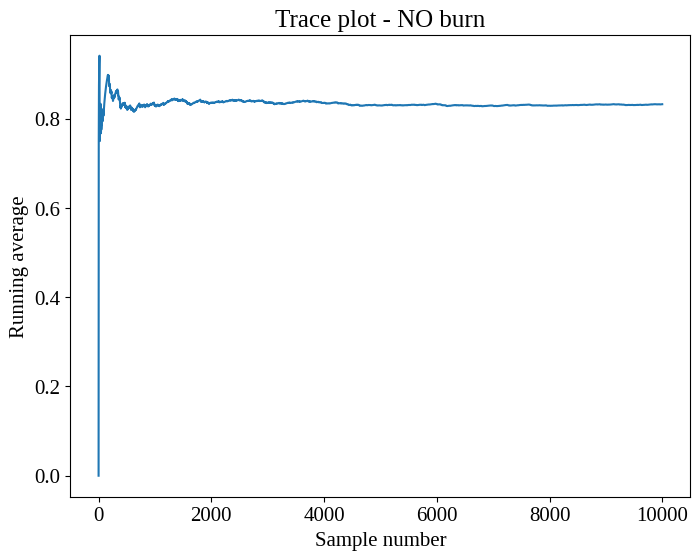

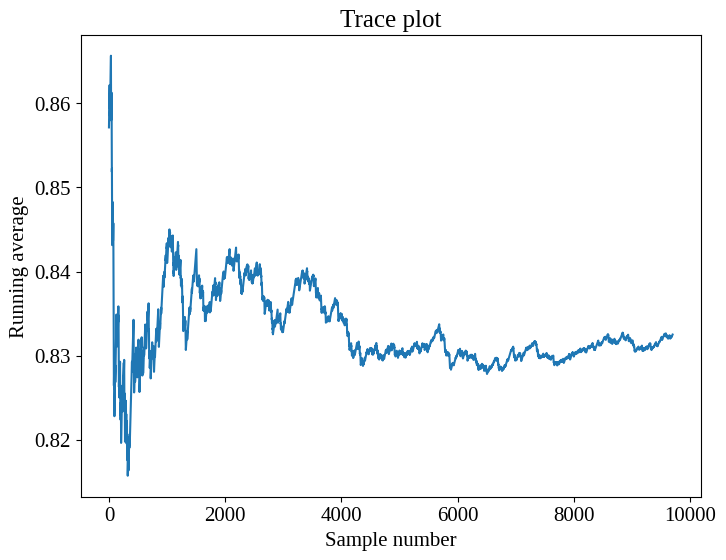

In [3]:
N=10000
start=0 #cloudy

weather=np.empty(N)
run_avg=np.empty(N)

today=next_day(start)
weather[0]=today

for i in range(N-1):
    today=next_day(today)
    weather[i+1]=today

run_avg=np.cumsum(weather)/(np.arange(0, N)+1)

burn=300

plt.plot(run_avg)
plt.title('Trace plot - NO burn')
plt.xlabel('Sample number')
plt.ylabel('Running average')
plt.show()

plt.plot(run_avg[burn:])
plt.title('Trace plot')
plt.xlabel('Sample number')
plt.ylabel('Running average')
plt.show()

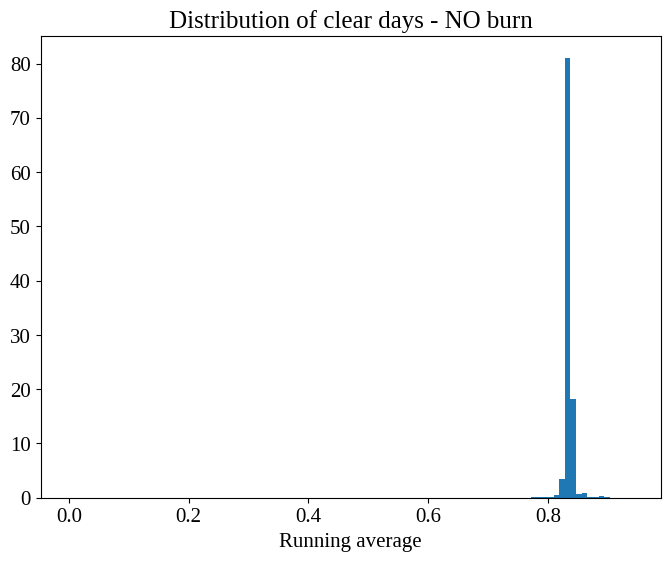

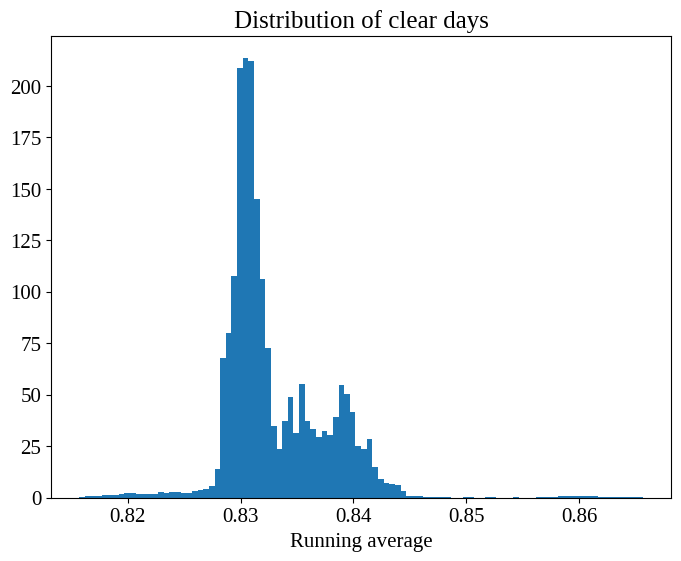

the median is:  0.831
with an error:  0.004


In [19]:
plt.hist(run_avg, bins=100, density=True);
plt.title('Distribution of clear days - NO burn')
plt.xlabel('Running average')
plt.show()

plt.hist(run_avg[burn:], bins=100, density=True);
plt.title('Distribution of clear days')
plt.xlabel('Running average')
plt.show()

median=np.median(run_avg)
sigma=astroML.stats.sigmaG(run_avg)

print("the median is: ", round(median,3))
print("with an error: ", round(sigma,3))